In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import sys
import seaborn as sns
from scipy.special import comb
from sklearn.preprocessing import PolynomialFeatures
from matplotlib.colors import LogNorm
import pandas as pd
import scipy.stats as st
from matplotlib.patches import Patch

plt.rcParams.update({'font.size': 7,'axes.linewidth':0.5,
                     'xtick.major.size':2,'xtick.major.width':0.5,
                    'ytick.major.size':2,'ytick.major.width':0.5})
plt.rcParams.update({'mathtext.default':  'regular' })


colorH1, colorH3, colorFluB, colorH9 = "#E8735C", "#72C2A6", "#5482A7", "#663399"


In [3]:
# set some things
num_mutations_H1 = 16
order_H1 = 5
total_params_H1 = np.sum(np.array([int(comb(num_mutations_H1,i)) for i in range(1,order_H1+1)]))
total_params_H1_fullorder = np.sum(np.array([int(comb(num_mutations_H1,i)) for i in range(1,num_mutations_H1+1)]))

num_mutations_H3 = 13
order_H3 = 4
total_params_H3 = np.sum(np.array([int(comb(num_mutations_H3,i)) for i in range(1,order_H3+1)]))
total_params_H3_fullorder = np.sum(np.array([int(comb(num_mutations_H3,i)) for i in range(1,num_mutations_H3+1)]))

num_mutations_B = 8
order_B = 1
total_params_B = np.sum(np.array([int(comb(num_mutations_B,i)) for i in range(1,order_B+1)]))
total_params_B_fullorder = np.sum(np.array([int(comb(num_mutations_B,i)) for i in range(1,num_mutations_B+1)]))


num_mutations_6261_H1 = 11
order_6261_H1 = 4
total_params_6261_H1 = np.sum(np.array([int(comb(num_mutations_6261_H1,i)) for i in range(1,order_6261_H1+1)]))


num_mutations_6261_H9 = 11
order_6261_H9 = 4
total_params_6261_H9 = np.sum(np.array([int(comb(num_mutations_6261_H9,i)) for i in range(1,order_6261_H9+1)]))

total_params_6261_fullorder = np.sum(np.array([int(comb(num_mutations_6261_H1,i)) for i in range(1,num_mutations_6261_H1+1)]))




# 9114

In [107]:
# read model coefficients

coefs_H1_stat = np.zeros(total_params_H1+1)
sig_H1_stat = np.full((total_params_H1+1),0)
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H1_'+str(order_H1)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H1+1):
        row = next(coef_reader)
        coefs_H1_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H1_stat[i] = 1
    readfile.close()           
num_sig_H1_stat = len(np.nonzero(sig_H1_stat == 1)[0])

coefs_H1_fullorder = np.zeros(total_params_H1_fullorder+1)
sig_H1_fullorder = np.full((total_params_H1_fullorder+1),0)
names_H1_fullorder = []
names_H1_fullorder_all = []
with open('coefs/9114_H1_fullorder.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    header = next(coef_reader)
    for i in range(total_params_H1_fullorder+1):
        row = next(coef_reader)
        coefs_H1_fullorder[i] = float(row[1])
        names_H1_fullorder_all.append(row[0])
        if i >= 1:
            if float(row[3]) < 0.05/float(total_params_H1_fullorder+1):
                names_H1_fullorder.append(row[0])
                sig_H1_fullorder[i] = 1
    readfile.close()           
num_sig_H1_fullorder = len(np.nonzero(sig_H1_fullorder == 1)[0])


print(num_sig_H1_stat,num_sig_H1_fullorder)



coefs_H3_stat = np.zeros(total_params_H3+1)
sig_H3_stat = np.full((total_params_H3+1),0)
with open('../../../CR9114/Epistasis_linear_models/model_coefs/H3_'+str(order_H3)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_H3+1):
        row = next(coef_reader)
        coefs_H3_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_H3_stat[i] = 1
    readfile.close()           
num_sig_H3_stat = len(np.nonzero(sig_H3_stat == 1)[0])

coefs_H3_fullorder = np.zeros(total_params_H3_fullorder+1)
sig_H3_fullorder = np.full((total_params_H3_fullorder+1),0)
names_H3_fullorder = []
with open('coefs/9114_H3_fullorder.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    header = next(coef_reader)
    for i in range(total_params_H3_fullorder+1):
        row = next(coef_reader)
        coefs_H3_fullorder[i] = float(row[1])
        if i >= 1:
            if float(row[3]) < 0.05/float(total_params_H3_fullorder+1):
                sig_H3_fullorder[i] = 1
                names_H3_fullorder.append(row[0])

    readfile.close()           
num_sig_H3_fullorder = len(np.nonzero(sig_H3_fullorder == 1)[0])


print(num_sig_H3_stat,num_sig_H3_fullorder)


coefs_B_stat = np.zeros(total_params_B+1)
sig_B_stat = np.full((total_params_B+1),0)
with open('../../../CR9114/Epistasis_linear_models/model_coefs/B_'+str(order_B)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_B+1):
        row = next(coef_reader)
        coefs_B_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_B_stat[i] = 1
    readfile.close()           
num_sig_B_stat = len(np.nonzero(sig_B_stat == 1)[0])

coefs_B_fullorder = np.zeros(total_params_B_fullorder+1)
sig_B_fullorder = np.full((total_params_B_fullorder+1),0)
names_B_fullorder = []
with open('coefs/9114_FluB_fullorder.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    header = next(coef_reader)
    for i in range(total_params_B_fullorder+1):
        row = next(coef_reader)
        coefs_B_fullorder[i] = float(row[1])
        if i >= 1:
            if float(row[3]) < 0.05/float(total_params_B_fullorder+1):
                sig_B_fullorder[i] = 1
                names_B_fullorder.append(row[0])

    readfile.close()           
num_sig_B_fullorder = len(np.nonzero(sig_B_fullorder == 1)[0])


print(num_sig_B_stat,num_sig_B_fullorder)



354 1035
128 153
6 27


# 6261

In [48]:
# read model coefficients

coefs_6261_H1_stat = np.zeros(total_params_6261_H1+1)
sig_6261_H1_stat = np.full((total_params_6261_H1+1),0)
with open('../../../CR6261/Epistasis_linear_models/model_coefs/H1_'+str(order_6261_H1)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H1+1):
        row = next(coef_reader)
        coefs_6261_H1_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H1_stat[i] = 1
    readfile.close()           
num_sig_6261_H1_stat = len(np.nonzero(sig_6261_H1_stat == 1)[0])

coefs_6261_H1_fullorder = np.zeros(total_params_6261_fullorder+1)
sig_6261_H1_fullorder = np.full((total_params_6261_fullorder+1),0)
names_6261_H1_fullorder = []
with open('coefs/6261_H1_fullorder.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    header = next(coef_reader)
    for i in range(total_params_6261_fullorder+1):
        row = next(coef_reader)
        coefs_6261_H1_fullorder[i] = float(row[1])
        if i >= 1:
             if float(row[3]) < 0.05/float(total_params_6261_fullorder+1):
                sig_6261_H1_fullorder[i] = 1
                names_6261_H1_fullorder.append(row[0])
    readfile.close()           
num_sig_6261_H1_fullorder = len(np.nonzero(sig_6261_H1_fullorder == 1)[0])


print(num_sig_6261_H1_stat,num_sig_6261_H1_fullorder)


coefs_6261_H9_stat = np.zeros(total_params_6261_H9+1)
sig_6261_H9_stat = np.full((total_params_6261_H9+1),0)
with open('../../../CR6261/Epistasis_linear_models/model_coefs/H9_'+str(order_6261_H9)+'order_stat.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    num_params = int(next(coef_reader)[-1])
    r2 = float(next(coef_reader)[-1])
    header = next(coef_reader)
    for i in range(total_params_6261_H9+1):
        row = next(coef_reader)
        coefs_6261_H9_stat[i] = float(row[1])
        if i >= 1:
             if float(row[4])*float(row[5]) > 0:
                sig_6261_H9_stat[i] = 1
    readfile.close()           
num_sig_6261_H9_stat = len(np.nonzero(sig_6261_H9_stat == 1)[0])

coefs_6261_H9_fullorder = np.zeros(total_params_6261_fullorder+1)
sig_6261_H9_fullorder = np.full((total_params_6261_fullorder+1),0)
names_6261_H9_fullorder = []
with open('coefs/6261_H9_fullorder.txt','r') as readfile:
    coef_reader = csv.reader(readfile,delimiter='\t')
    header = next(coef_reader)
    for i in range(total_params_6261_fullorder+1):
        row = next(coef_reader)
        coefs_6261_H9_fullorder[i] = float(row[1])
        if i >= 1:
             if float(row[3]) < 0.05/float(total_params_6261_fullorder+1):
                sig_6261_H9_fullorder[i] = 1
                names_6261_H9_fullorder.append(row[0])
    readfile.close()           
num_sig_6261_H9_fullorder = len(np.nonzero(sig_6261_H9_fullorder == 1)[0])


print(num_sig_6261_H9_stat,num_sig_6261_H9_fullorder)


87 153
62 198


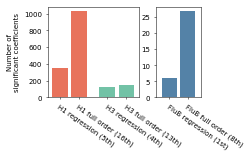

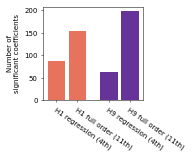

In [98]:
fig,(ax1,ax2) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [2, 1]},figsize=(3.5,2.2))

width = 0.1
adj = 0.01

ax1.bar(1-width/2-adj,num_sig_H1_stat,width=width,color=colorH1)
ax1.bar(1+width/2+adj,num_sig_H1_fullorder,width=width,color=colorH1)

ax1.bar(1.3-width/2-adj,num_sig_H3_stat,width=width,color=colorH3)
ax1.bar(1.3+width/2+adj,num_sig_H3_fullorder,width=width,color=colorH3)

ax1.set_xticks([1-width/2-adj,1+width/2+adj,1.3-width/2-adj,1.3+width/2+adj])
ax1.set_xticklabels(['H1 regression (5th)','H1 full order (16th)','H3 regression (4th)','H3 full order (13th)'],
           rotation=-35,ha='left',rotation_mode="anchor")
ax1.set_ylabel('Number of\nsignificant coefficients')

width = 0.1
adj = 0.01

ax2.bar(1-width/2-adj,num_sig_B_stat,width=width,color=colorFluB)
ax2.bar(1+width/2+adj,num_sig_B_fullorder,width=width,color=colorFluB)

ax2.set_xticks([1-width/2-adj,1+width/2+adj])
ax2.set_xticklabels(['FluB regression (1st)','FluB full order (8th)'],
           rotation=-35,ha='left',rotation_mode="anchor")
ax2.set_xlim([0.85,1.15])
plt.subplots_adjust(wspace=-1.5)
plt.tight_layout()
plt.gcf().subplots_adjust(right=0.8)
plt.savefig('images/sig_coef_comparison_9114.pdf')
plt.show()



fig,ax = plt.subplots(figsize=(2.6,2.2))

plt.bar(1-width/2-adj,num_sig_6261_H1_stat,width=width,color=colorH1)
plt.bar(1+width/2+adj,num_sig_6261_H1_fullorder,width=width,color=colorH1)

plt.bar(1.3-width/2-adj,num_sig_6261_H9_stat,width=width,color=colorH9)
plt.bar(1.3+width/2+adj,num_sig_6261_H9_fullorder,width=width,color=colorH9)

plt.xticks([1-width/2-adj,1+width/2+adj,1.3-width/2-adj,1.3+width/2+adj],
           ['H1 regression (4th)','H1 full order (11th)','H9 regression (4th)','H9 full order (11th)']
           ,rotation=-35,ha='left',rotation_mode="anchor")
plt.ylabel('Number of\nsignificant coefficients')

plt.tight_layout()
plt.savefig('images/sig_coef_comparison_6261.pdf')

plt.show()



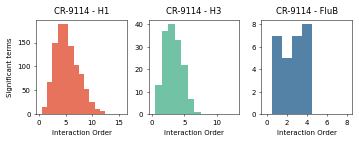

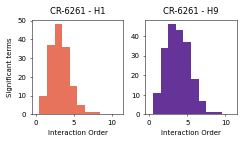

In [71]:
# plot full order distributions
plt.figure(figsize=(5,2))
plt.subplot(131)
orders_H1 = [len(x.split(',')) for x in names_H1_fullorder]
plt.hist(orders_H1,bins=np.arange(-0.5,16.5,1),color=colorH1)
plt.xlim([-0.5,16.5])
plt.xlabel('Interaction Order')
plt.ylabel('Significant terms')
plt.title('CR-9114 - H1')


plt.subplot(132)
orders_H3 = [len(x.split(',')) for x in names_H3_fullorder]
plt.hist(orders_H3,bins=np.arange(-0.5,13.5,1),color=colorH3)
plt.xlim([-0.5,13.5])
plt.xlabel('Interaction Order')
#plt.ylabel('Significant terms')
plt.title('CR-9114 - H3')


plt.subplot(133)
orders_B = [len(x.split(',')) for x in names_B_fullorder]
plt.hist(orders_B,bins=np.arange(-0.5,8.5,1),color=colorFluB)
plt.xlabel('Interaction Order')
plt.xlim([-0.5,8.5])
plt.xticks([0,2,4,6,8],['0','2','4','6','8'])
#plt.ylabel('Significant terms')
plt.title('CR-9114 - FluB')
plt.tight_layout()
plt.savefig('images/9114_fullorder_coef_dists.pdf')
plt.show()



# plot full order distributions
plt.figure(figsize=(3.4,2))
plt.subplot(121)
orders_H1 = [len(x.split(',')) for x in names_6261_H1_fullorder]
plt.hist(orders_H1,bins=np.arange(-0.5,11.5,1),color=colorH1)
plt.xlim([-0.5,11.5])
plt.xlabel('Interaction Order')
plt.ylabel('Significant terms')
plt.title('CR-6261 - H1')



plt.subplot(122)
orders_H9 = [len(x.split(',')) for x in names_6261_H9_fullorder]
plt.hist(orders_H9,bins=np.arange(-0.5,11.5,1),color=colorH9)
plt.xlabel('Interaction Order')
plt.xlim([-0.5,11.5])
#plt.ylabel('Significant terms')
plt.title('CR-6261 - H9')
plt.tight_layout()
plt.savefig('images/6261_fullorder_coef_dists.pdf')

plt.show()


